# An algorithm to predict the **price for sales** of different items in a business with maximuim accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('SalesStore.csv')
print(data.head())
print(data.tail())

   Order_Date   Ship_Date Ship_Mode  Postal_Code   Region Product_Reference  \
0  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
1  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10023012   
2  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10002828   
3  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10022901   
4  2021-02-15  2021-02-20    Ground        44104  Midwest  OFF-TAP-10000482   

          Category Sub_Category  Sales  Quantity  Profit State  
0  Office Supplies         Tape      5         1    0.15    OH  
1  Office Supplies         Tape      5         1    0.15    OH  
2  Office Supplies         Tape      5         1    0.15    OH  
3  Office Supplies         Tape      5         1    0.15    OH  
4  Office Supplies         Tape      5         1    0.15    OH  
     Order_Date   Ship_Date Ship_Mode  Postal_Code Region Product_Reference  \
211  2024-01-09  2024-01-14    Ground        20004   Eas

In [3]:
# To Check if there are any missing values
data.isnull().sum()

Order_Date           0
Ship_Date            0
Ship_Mode            0
Postal_Code          0
Region               0
Product_Reference    0
Category             0
Sub_Category         0
Sales                0
Quantity             0
Profit               0
State                0
dtype: int64

# Removing uneccessary columns

In [4]:
# We will remove the 'Ship_Date' and 'Order_Date' column because it has no interest with predicting the number of 'Sales' made
data.drop(['Ship_Date','Order_Date'], axis=1, inplace = True)

In [5]:
print(data['Product_Reference'].unique())
# The 'Product_Reference' column has too many unique variables, for this reason, it will be removed because it doesn't help the algorithm
data.drop('Product_Reference', axis=1, inplace = True)

['OFF-TAP-10022901' 'OFF-TAP-10023012' 'OFF-TAP-10002828'
 'OFF-TAP-10000482' 'FUR-CH-10000454' 'FUR-SOF-10009567'
 'FUR-SOF-10001414' 'FUR-SOF-10016578' 'FUR-SOF-10000468'
 'FUR-CHA-10023012' 'FUR-CHA-10024123' 'FUR-CHA-10002929'
 'FUR-CHA-10000483' 'OFF-PAP-10001234' 'OFF-PAP-10001111'
 'OFF-PAP-10001578' 'OFF-PAP-10000455' 'ELE-TAB-10010678'
 'ELE-TAB-10001515' 'ELE-TAB-10017689' 'ELE-TAB-10000469'
 'ELE-SPE-10024123' 'ELE-SPE-10025234' 'ELE-SPE-10003030'
 'ELE-SPE-10000484' 'FUR-CH-10002345' 'FUR-CHA-10002345'
 'FUR-CHA-10002222' 'FUR-CHA-10002789' 'FUR-CHA-10000456'
 'OFF-MAR-10011789' 'OFF-MAR-10001616' 'OFF-MAR-10018901'
 'OFF-MAR-10000470' 'ELE-LAP-10003456' 'ELE-LAP-10003333'
 'ELE-LAP-10004567' 'ELE-LAP-10000457' 'OFF-ERA-10025234'
 'OFF-ERA-10026345' 'OFF-ERA-10003131' 'OFF-ERA-10000485'
 'FUR-BED-10012890' 'FUR-BED-10001717' 'FUR-BED-10019890'
 'FUR-BED-10000471' 'OFF-PEN-10004567' 'OFF-PEN-10004444'
 'OFF-PEN-10005678' 'OFF-PEN-10000458' 'FUR-DES-10026345'
 'FUR-DES-100274

## The only way to get a profit on sales is by first making the sales. Since our model is about predicting the **number of Sales** that can be made, there is no need to work with the **'Profit'** column 

In [6]:
# Removing the 'Profit' column
data.drop('Profit', axis = 1, inplace= True)

In [7]:
data.head()

,Ship_Mode,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,State
0,Ground,44104,Midwest,Office Supplies,Tape,5,1,OH
1,Ground,44104,Midwest,Office Supplies,Tape,5,1,OH
2,Ground,44104,Midwest,Office Supplies,Tape,5,1,OH
3,Ground,44104,Midwest,Office Supplies,Tape,5,1,OH
4,Ground,44104,Midwest,Office Supplies,Tape,5,1,OH


# Exploratory Data Analysis

In [8]:
data['Region'].value_counts()

Region
South      76
Midwest    61
West       49
East       30
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

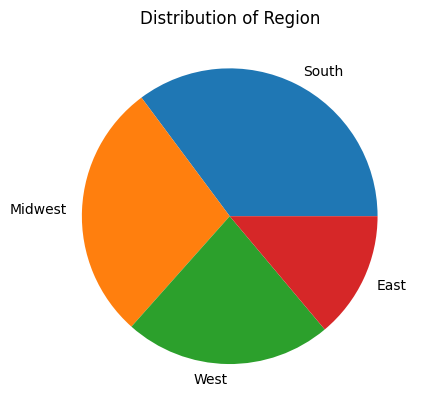

In [9]:
labelling= ['South', 'Midwest', 'West', 'East']
plt.pie(data['Region'].value_counts(), labels=labelling)
plt.title('Distribution of Region')
plt.show

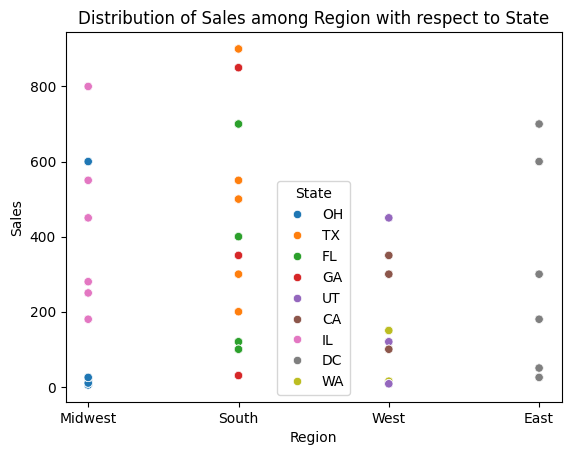

In [10]:
sns.scatterplot(y='Sales', x= 'Region',hue='State', data= data)
plt.title('Distribution of Sales among Region with respect to State')
plt.show()
# From the plot below, we see that the 'Region' of the State is sufficient enough because the States are perfectly grouped according their region

In [11]:
# We will make use of 'Region' column for simplicity (Removing the 'State' column)
data.drop('State', axis = 1, inplace= True)

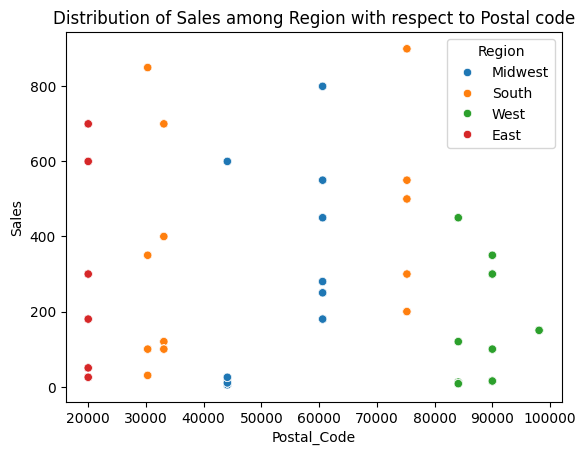

In [12]:
sns.scatterplot(y='Sales', x= 'Postal_Code',hue='Region', data= data)
plt.title('Distribution of Sales among Region with respect to Postal code')
plt.show()

- ## There are different Postal codes with the same Region
- ## 'Region' is not perfectly grouped with 'postal_Code' like in the case of 'States'

<Axes: title={'center': 'Correlation between Postal Code and Sales'}>

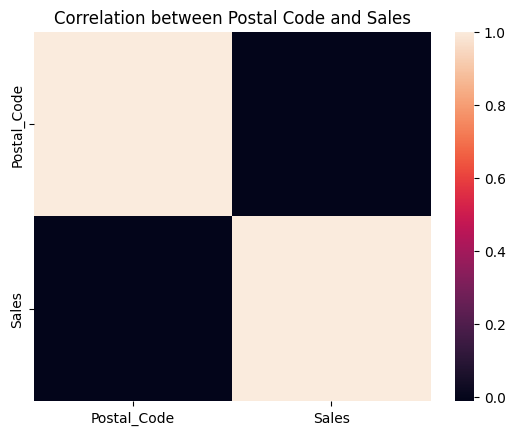

In [13]:
sim = data[['Postal_Code', 'Sales']].corr()
plt.title('Correlation between Postal Code and Sales')
sns.heatmap(sim)

### The correlation between 'Postal_Code and Sales' is Zero, meaning there is no relationship at all!

In [14]:
# Removing 'Postal_Code' column
data.drop('Postal_Code', axis = 1, inplace=True)
data.head()

,Ship_Mode,Region,Category,Sub_Category,Sales,Quantity
0,Ground,Midwest,Office Supplies,Tape,5,1
1,Ground,Midwest,Office Supplies,Tape,5,1
2,Ground,Midwest,Office Supplies,Tape,5,1
3,Ground,Midwest,Office Supplies,Tape,5,1
4,Ground,Midwest,Office Supplies,Tape,5,1


<function matplotlib.pyplot.show(close=None, block=None)>

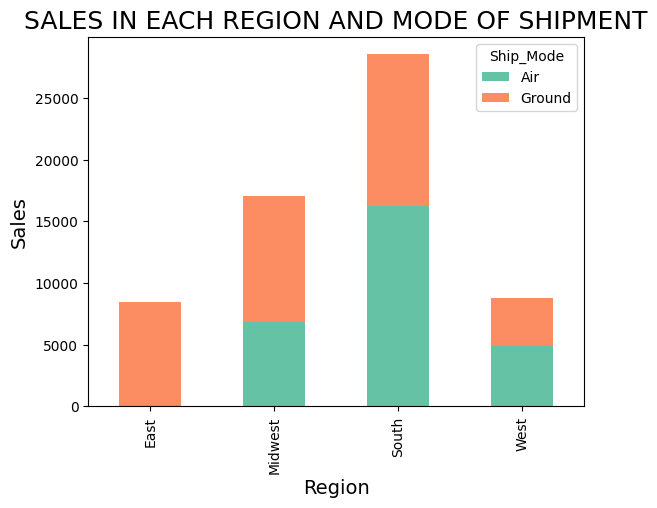

In [15]:
sum1 = data.groupby(['Region', 'Ship_Mode'])['Sales'].sum().unstack(fill_value=0)
sum1.plot(kind = 'bar',  stacked=True, color=sns.color_palette("Set2"))
#sns.barplot(y = 'Sales', x = 'Region', hue = 'Ship_Mode', data = data)
plt.title('SALES IN EACH REGION AND MODE OF SHIPMENT',fontsize = 18)
plt.xlabel('Region',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.show

In [16]:
data['Category'].value_counts()

Category
Office Supplies    73
Electronics        72
Furniture          71
Name: count, dtype: int64

In [17]:
data['Sub_Category'].value_counts()

Sub_Category
Chairs               13
Desks                11
Printers             11
Bookcases            10
Notebooks            10
Staplers             10
Headphones           10
Tables               10
Laptops              10
Smartwatches          6
Monitors              6
Scissors              6
Beds                  6
Markers               6
Tablets               6
Paper                 6
Sofas                 6
Pens                  6
Glue                  5
Rulers                5
Accessories           5
Lighting              5
Outdoor Furniture     5
Tape                  5
Cameras               5
Storage               5
Erasers               5
Speakers              5
Envelopes             5
Pencils               4
Phones                4
Smartphones           4
Name: count, dtype: int64

In [18]:
# To group every Sub_Category within each Category
counts = data.groupby(['Category', 'Sub_Category'])['Quantity'].sum().unstack(fill_value=0)


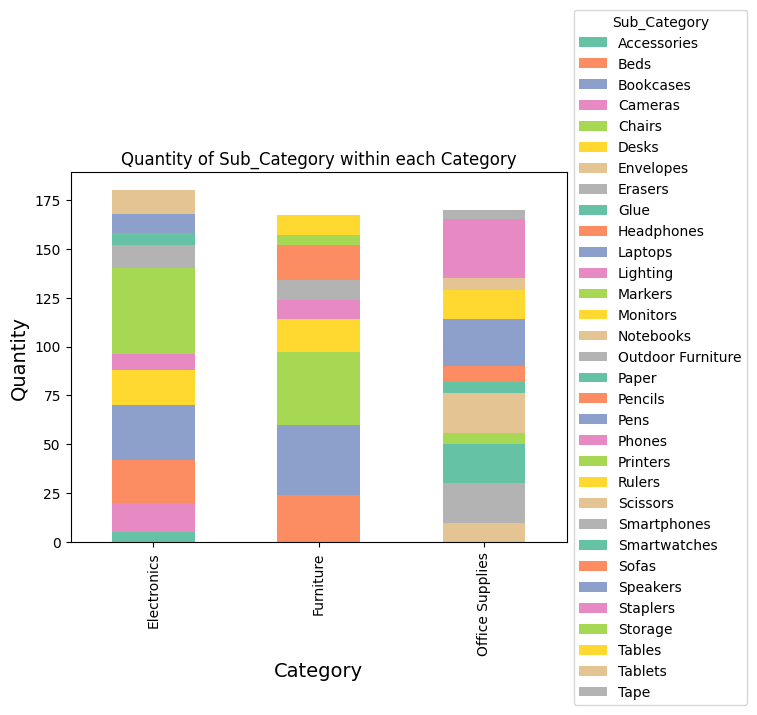

In [19]:
counts.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Quantity', fontsize = 14)
plt.title('Quantity of Sub_Category within each Category')
plt.legend(title='Sub_Category', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
data.head()

,Ship_Mode,Region,Category,Sub_Category,Sales,Quantity
0,Ground,Midwest,Office Supplies,Tape,5,1
1,Ground,Midwest,Office Supplies,Tape,5,1
2,Ground,Midwest,Office Supplies,Tape,5,1
3,Ground,Midwest,Office Supplies,Tape,5,1
4,Ground,Midwest,Office Supplies,Tape,5,1


# Transforming columns with categorical variables to numerical variables

In [21]:
# List columns with categorical/object variables
categorical_column = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_column

['Ship_Mode', 'Region', 'Category', 'Sub_Category']

In [22]:
# Convert categorical columns to numeric codes
#for col in data.select_dtypes(include=['object', 'category']).columns:
#    data[col] = pd.factorize(data[col])[0]

#print(data.tail())

In [23]:
# Method 2
# Since we will be testing with new data, we will use LabelEncoder()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in data.select_dtypes(include = ['object', 'category']).columns:
    data[col] = label_encoder.fit_transform(data[col])

data.tail()

,Ship_Mode,Region,Category,Sub_Category,Sales,Quantity
211,1,0,0,20,300,4
212,1,0,0,20,300,4
213,1,0,0,20,300,4
214,1,0,0,20,300,4
215,1,0,0,20,300,4


In [24]:
final_data = data

# Performing **XGBoostRegressor** to predict the amount of Sales in the store

In [25]:
# Prepare the dataset
x = final_data.drop(['Sales'], axis = 1).values
y = final_data['Sales'].values

In [26]:
# Importing libraries
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

## **Add Interaction Features or Polynomial Features**: used with linear regression to model non-linear data.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_poly = poly.fit_transform(x)

# Split the dataset with new polynomial features
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

# **Result Prediction.... using XGBRegressor** (For regression Problems)

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics


# Define the hyper parameter grid
param_grid = {
    'max_depth': [3, 6, 10],                           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],                # Step size shrinkage 
    'n_estimators': [100, 500, 1000],                  # Number of boosting rounds
}

# Instantiate the model
model2 = XGBRegressor()

# Use GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)   
grid_search.fit(x_train, y_train)

# Get best hyperparameters / score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best Score: 0.9513366222381592


In [30]:
y_pred

array([180.00084 , 299.9994  , 849.9996  , 350.00015 , 699.9998  ,
       250.00102 , 180.00075 ,  50.000015,  24.99984 , 849.9996  ,
       549.9989  , 449.99976 , 280.0008  , 500.00076 , 899.99963 ,
       350.00015 , 100.00039 , 200.00233 , 111.42852 , 899.99963 ,
         8.000274,  10.000025, 350.0001  ,  99.99994 , 149.99997 ,
       199.99991 ,  29.999907, 699.9998  ,  19.999968,  25.000526,
        15.000247, 799.9994  , 250.00102 , 280.0008  , 366.66663 ,
       599.99976 , 449.9998  , 600.0002  , 111.42852 ,  15.00089 ,
        15.00089 , 180.00075 , 111.42852 , 700.00006 ], dtype=float32)

In [31]:
# To check accuracy
metrics.r2_score(y_test,y_pred)

0.9986216425895691

In [32]:
# To calculate the error difference of the testing data and predicted data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.164920676838268

# The price of sales of any Item related to different categories and attributes can be accurately predicted

### Example using random data

In [37]:
sample = [[1,0,2,27,60]]                   # As 2D array
sample = scaler.transform(sample)      # Scaling the sample
sample = poly.transform(sample)        # Adding interactive features to establish linear relation
prediction = best_model.predict(sample)     # Carrying out XGBRegression


In [38]:
print(f'Price of Sales is {prediction}$')

Price of Sales is [163.33762]$


## Saving our model (using joblib)

In [39]:
# For data management
import joblib

In [40]:
# Saving our model and preprocessing packages
joblib.dump(poly, 'poly_feat.sav')

joblib.dump(scaler, 'std_scaler.sav')

joblib.dump(best_model, 'model.sav')

['model.sav']